In [1]:
help(pet)

Help on pipet in module fismed.fismed object:

class pipet(builtins.object)
 |  Methods defined here:
 |  
 |  __init__(self)
 |      Main instance constructor
 |  
 |  acquire(self, mode='auto', events=1000, frames=None, show=False)
 |      Acquire data either in auto, single_a, single_b or coinc mode
 |  
 |  config(self, name, value, update=True)
 |      Configures FPGA registers (not intended for the user)
 |  
 |  delay(self, steps=0)
 |      Sets the delay steps between DCFD_A and DCFD_B
 |  
 |  init(self, bitfile='../../firmware/default.bit')
 |      Initializes the device and uploads the firmware
 |  
 |  oe_init(self)
 |      Enable output buses (not intended for the user)
 |  
 |  osc(self, enable)
 |      Enables the internal oscillator to the DCFD output for CW measurements
 |  
 |  rates(self, print_rates=False)
 |      Return trigger rates
 |  
 |  read_acq_pipe(self, length)
 |      Read data from internal FIFO (not intended for the user)
 |  
 |  reset_daqs(self)
 |   

In [1]:
pet.init('../../firmware/default.bit')

------------------------------------------------------------
PiPET learning system - University of Pisa
------------------------------------------------------------
Mainboard initialized: 16:10:40 28-02-2023
    Firmware path: ../../firmware/default.bit (19/03/2018 08:47)
------------------------------------------------------------
Device ready.


In [6]:
print(pet.rates())

{'cnc_b': 9, 'cfd_b': 6311, 'dly_a': 2, 'dly_b': 0, 'cfd_a': 5956, 'cnc_a': 9}


In [8]:
fname = 'bg_detB_150mV_950HV.dat'
with open(fname,'wb') as f:
    for i in range(1):
        pet.acquire(mode='single_b', events=100000, show=True).tofile(f)
data = decfromfile(fname)

In [10]:
data['b']['xa'][0:10]

array([3076, 1649, 3091, 2089, 3087, 3066,  843, 3067,  140,  520],
      dtype=uint16)

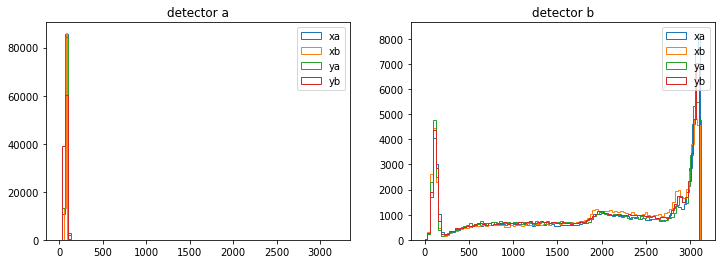

In [11]:
f, ax = subplots(1,2,figsize=(12,4))
for i,detector in enumerate(['a','b']):
    ax[i].hist(data[detector]['xa'],bins=100,label='xa',histtype='step');
    ax[i].hist(data[detector]['xb'],bins=100,label='xb',histtype='step');
    ax[i].hist(data[detector]['ya'],bins=100,label='ya',histtype='step');
    ax[i].hist(data[detector]['yb'],bins=100,label='yb',histtype='step');
    ax[i].set_title('detector '+detector)
    ax[i].legend()

In [8]:
with open('piedistallo.dat','wb') as f:
    for i in range(1):
        pet.acquire(mode='auto', events=10000, show=False).tofile(f)
p = pedestals('piedistallo.dat')
print(p['a'])
print(p['b'])

{'xb': 83.971, 'yb': 90.3548, 'xa': 90.766, 'ya': 90.0147}
{'xb': 83.6079, 'yb': 81.9838, 'xa': 83.8642, 'ya': 88.0404}


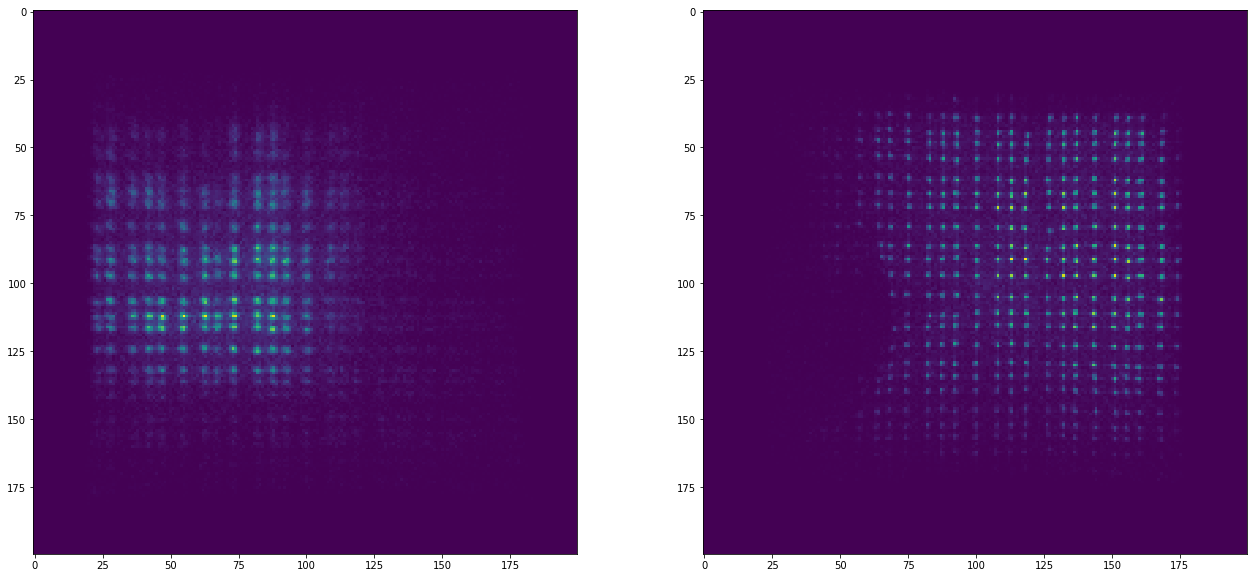

In [10]:
f, ax = subplots(1,2,figsize=(22,10))
for i,detector in enumerate(['a','b']):
    a = data
    xa = a[detector]['xa'].astype(float)
    xb = a[detector]['xb'].astype(float)
    ya = a[detector]['ya'].astype(float)
    yb = a[detector]['yb'].astype(float)
    xa -= p[detector]['xa']
    xb -= p[detector]['xb']
    ya -= p[detector]['ya']
    yb -= p[detector]['yb']
    e = xa + xb + ya +yb
    x = (xa-xb)/(xa+xb)
    y = (ya-yb)/(ya+yb)
    h2d, xe, ye = histogram2d(x,y,bins=(200,200),range=[(-1,1),(-1,1)])
    ax[i].imshow(h2d)